# Caracterización de opiniones en redes sociales. Caso del período de la pandemia 
# Covid-19 en Chile.

### ♦ Guillermo Fuentes 20.544.764-4
### ♦ Exequiel González 20.416.349-9
### ♦ Andrea Saldaña 19.951.969-7


### Resumen ejecutivo de la propuesta 
En este proyecto de ciencia de datos, se abordará la caracterización de opiniones 
expresadas en las redes sociales durante el período de la pandemia de COVID-19 en 
Chile, utilizando un conjunto de datos originales que contiene tweets emitidos entre 
octubre de 2019 y noviembre de 2020. El objetivo principal es analizar y entender las 
opiniones de la población chilena sobre eventos y políticas relacionadas con la 
pandemia.


### Objetivos y su progreso

1. Preprocesamiento de Datos: Se ha avanzado en la etapa de comprensión y preprocesamiento de datos, donde se eliminan elementos no deseados en los tweets y se normaliza el texto, preparándolo para el análisis.

2. Implementación de TF-IDF: Se ha implementado la técnica TF-IDF para convertir el texto de los tweets en vectores numéricos, lo que permite representar el contenido de manera numérica para su análisis.

3. Identificación de Grupos de Opiniones: Se planea aplicar la técnica de similitud del coseno para validar similitudes entre los tweets, lo que puede ayudar a identificar grupos significativos de opiniones en los datos.

4. Técnica de Similitud del Coseno: Esta técnica se utilizará para medir la similitud entre los vectores numéricos que representan los tweets, lo que permitirá agrupar tweets similares y detectar patrones en las opiniones.

5. Algoritmos de Agrupamiento (K-Means): Para la identificación de grupos de opiniones, se han aplicado algoritmos de agrupamiento, como K-Means, que agrupan los tweets en clusters en función de su similitud, lo que facilita la caracterización de las clases y tendencias generales de las opiniones.


y por último se ha decidido recuperar un objetivo eliminado, que sería: 

6. Explorar los datos mediante métricas estadísticas y visualizaciones para 
comprender las tendencias generales de las opiniones durante la pandemia


Este objetivo implica llevar a cabo un análisis exploratorio de datos (EDA) utilizando métricas estadísticas y visualizaciones para comprender las tendencias generales de las opiniones expresadas durante la pandemia en el conjunto de datos. Esto incluiría calcular estadísticas descriptivas para comprender la distribución de las opiniones en diferentes clases y categorías. Además, se crearían visualizaciones, como gráficos, para representar visualmente patrones, relaciones y tendencias en los datos. Este análisis ayudaría a identificar insights clave sobre cómo se han manifestado las opiniones en los tweets a lo largo del tiempo y en diferentes contextos, lo que podría ser útil para la toma de decisiones y la comprensión de la dinámica de las opiniones durante la pandemia.

1- Se importa la biblioteca pandas con el alias 'pd'.
2- Se define la variable 'file_path' que contiene la ruta del archivo CSV que se desea cargar ('Tweets.csv').
3- Se utiliza la función 'pd.read_csv()' para leer el archivo CSV y cargar sus datos en un DataFrame llamado 'tweets_df'.
4- Se llama a 'tweets_df.head()' para mostrar las primeras filas del DataFrame. Esto permite inspeccionar las primeras filas del conjunto de datos y comprender su estructura, que es la tabla que se ve abajo.

In [1]:
import pandas as pd

# Cargando el archivo CSV
file_path = 'Tweets.csv'
tweets_df = pd.read_csv(file_path)

# Mostrando las primeras filas del DataFrame para entender su estructura
tweets_df.head()

,created_at,date,place,tweet,language,hashtags,nlikes,nreplies,nretweets,reply_to,clean_tweet,lemma_tweet,clean_tag,lemma_tag,sector,dia,short,clean_class,lemma_class
0,1.604175e+12,2020-10-31 17:11:59,Si,"#calvin está raja, pero raja flojeando en esta...",es,"['calvin', 'pandemia', 'iquique', 'tarapaca', ...",0,0,0,No,"['calvin', 'raja', 'raja', 'flojeando', 'pande...","['calvin', 'raja', 'raja', 'flojear', 'pandemi...","0,1,10","0,1,10",1,Sabado,No,Negativo,Negativo
1,1.604170e+12,2020-10-31 15:45:28,No,@claudioapruebo5 @NuevaConstituc3 Abren fantas...,es,[],20,0,12,Si,"['abren', 'fantasilandia', 'permiten', 'visite...","['abren', 'fantasilandia', 'permiten', 'visite...","1,1,18","1,1,18",1,Sabado,No,Neutro,Neutro
2,1.604162e+12,2020-10-31 13:25:02,No,▶️Autoridades dan a conocer el reporte actuali...,es,"['covid_19', 'tarapacá', 'iquique', 'altohospi...",0,0,0,No,"['autoridades', 'dan', 'conocer', 'reporte', '...","['autoridad', 'dan', 'conocer', 'reporte', 'ac...","0,1,16","1,1,16",1,Sabado,No,Negativo,Neutro
3,1.604156e+12,2020-10-31 11:49:33,No,"Reporte COVID-19, Tarapacá, 31/10/2020. 🕑 @u...",es,[],1,1,1,No,"['reporte', 'covid', '19', 'tarapacá', '31', '...","['reporte', 'covir', '19', 'tarapacá', '31', '...","1,0,30","1,4,30",1,Sabado,No,Positivo,Negativo
4,1.604153e+12,2020-10-31 10:55:10,No,👉🏼🦹🏻‍♀️Conoce las actividades de riesgo modera...,es,"['covid_19', 'halloween', 'cuidémonosentretodo...",0,1,0,No,"['conoce', 'actividades', 'riesgo', 'moderado'...","['conocer', 'actividad', 'riesgo', 'moderado',...","0,2,13","0,3,13",1,Sabado,No,Negativo,Negativo


In [2]:
# Tomamos los primeros 85,000 datos
df_subset_1 = tweets_df.head(85000).copy()

# Guardamos el resto del conjunto de datos
df_subset_2 = tweets_df.tail(len(tweets_df) - 85000).copy()

# Guarda los nuevos archivos CSV
df_subset_1.to_csv('subset_1.csv', index=False)
df_subset_2.to_csv('subset_2.csv', index=False)

df_subset_1 = tweets_df.head(85000).copy(): Esta línea crea un nuevo DataFrame llamado df_subset_1 copiando las primeras 85,000 filas del DataFrame original tweets_df. head(85000) toma las primeras 85,000 filas de tweets_df.

df_subset_2 = tweets_df.tail(len(tweets_df) - 85000).copy(): En esta línea, se crea un segundo DataFrame llamado df_subset_2 copiando las filas restantes del DataFrame original tweets_df. Para calcular cuántas filas se deben tomar, se resta 85,000 (el número de filas en df_subset_1) del número total de filas en tweets_df utilizando len(tweets_df).

df_subset_1.to_csv('subset_1.csv', index=False): Aquí se guarda el contenido de df_subset_1 en un archivo CSV llamado 'subset_1.csv'. El parámetro index=False indica que no se debe incluir el índice de las filas en el archivo CSV resultante.

df_subset_2.to_csv('subset_2.csv', index=False): De manera similar, esta línea guarda el contenido de df_subset_2 en un archivo CSV llamado 'subset_2.csv', también con la opción index=False para evitar incluir el índice en el archivo CSV.

In [3]:
# Inspeccionando los primeros elementos de la columna 'clean_tweet'
df_subset_1['clean_tweet'].head()

0    ['calvin', 'raja', 'raja', 'flojeando', 'pande...
1    ['abren', 'fantasilandia', 'permiten', 'visite...
2    ['autoridades', 'dan', 'conocer', 'reporte', '...
3    ['reporte', 'covid', '19', 'tarapacá', '31', '...
4    ['conoce', 'actividades', 'riesgo', 'moderado'...
Name: clean_tweet, dtype: object

df_subset_1['clean_tweet']: Accede a la columna llamada 'clean_tweet' en el DataFrame df_subset_1. Esto devuelve una serie de pandas que contiene los valores de la columna 'clean_tweet' en df_subset_1.

.head(): Después de acceder a la columna 'clean_tweet', se llama al método .head(). Este método se utiliza para mostrar las primeras filas de la serie o columna. Por defecto, muestra las primeras 5 filas si no se especifica un número diferente.

In [4]:
import ast  # Importando ast para convertir cadenas en listas

# Convertir las cadenas de 'clean_tweet' en listas de palabras
df_subset_1['clean_tweet_list'] = df_subset_1['clean_tweet'].apply(ast.literal_eval)

# Verificando las primeras filas después de la conversión
df_subset_1['clean_tweet_list'].head()

0    [calvin, raja, raja, flojeando, pandemia, iqui...
1    [abren, fantasilandia, permiten, visite, deudo...
2    [autoridades, dan, conocer, reporte, actualiza...
3    [reporte, covid, 19, tarapacá, 31, 10, 2020, i...
4    [conoce, actividades, riesgo, moderado, evitar...
Name: clean_tweet_list, dtype: object

import ast: Importa el módulo 'ast' en Python. 'ast' (Abstract Syntax Trees) se utiliza para analizar y manipular expresiones y estructuras de datos de Python, incluidas las cadenas que contienen representaciones literales de listas y otros objetos de Python.

df_subset_1['clean_tweet_list'] = df_subset_1['clean_tweet'].apply(ast.literal_eval):
a. df_subset_1['clean_tweet']: Accede a la columna 'clean_tweet' en el DataFrame df_subset_1. Esta columna contiene cadenas que representan listas de palabras.
b. .apply(ast.literal_eval): Aplica la función ast.literal_eval() a cada elemento de la columna 'clean_tweet'. ast.literal_eval() se utiliza para evaluar expresiones literales de Python contenidas en cadenas y convertirlas en objetos de Python. En este caso, se utiliza para convertir las cadenas que representan listas de palabras en listas reales de palabras.
c. El resultado de esta operación se almacena en una nueva columna llamada 'clean_tweet_list' en el DataFrame df_subset_1. En esta columna, cada elemento es una lista de palabras en lugar de una cadena.

df_subset_1['clean_tweet_list'].head(): Finalmente, esta línea muestra las primeras filas de la columna recién creada 'clean_tweet_list'. Proporciona una vista previa de las listas de palabras que ahora están almacenadas en lugar de las cadenas en el DataFrame df_subset_1. Cada fila de esta columna contiene una lista de palabras que representan el contenido limpio de los tweets.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Uniendo las palabras en cada lista para formar un texto completo para cada tweet
df_subset_1['clean_tweet_joined'] = df_subset_1['clean_tweet_list'].apply(lambda x: ' '.join(x))

# Creando el vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limitando a 5000 características para evitar excesiva dimensionalidad

# Aplicando el vectorizador a los textos de los tweets
tfidf_matrix = tfidf_vectorizer.fit_transform(df_subset_1['clean_tweet_joined'])

# Mostrando las dimensiones de la matriz TF-IDF resultante
tfidf_matrix.shape

(85000, 5000)

df_subset_1['clean_tweet_joined'] = df_subset_1['clean_tweet_list'].apply(lambda x: ' '.join(x)): Toma las listas de palabras en la columna 'clean_tweet_list' del DataFrame df_subset_1 y las une en un solo texto para cada tweet. La función lambda x: ' '.join(x) se utiliza para unir las palabras en cada lista con un espacio en blanco y el resultado se almacena en una nueva columna llamada 'clean_tweet_joined'.

from sklearn.feature_extraction.text import TfidfVectorizer: Importa la clase TfidfVectorizer del módulo sklearn.feature_extraction.text, que se utiliza para convertir texto en una representación numérica usando TF-IDF.

tfidf_vectorizer = TfidfVectorizer(max_features=5000): Crea un objeto TfidfVectorizer llamado tfidf_vectorizer que se configuró para considerar un máximo de 5000 características. Esto ayuda a limitar la dimensionalidad del conjunto de datos resultante.

tfidf_matrix = tfidf_vectorizer.fit_transform(df_subset_1['clean_tweet_joined']): Aplica el vectorizador TF-IDF a los textos de los tweets almacenados en la columna 'clean_tweet_joined' del DataFrame df_subset_1. Convierte estos textos en una matriz TF-IDF que representa la importancia de las palabras en cada tweet.

tfidf_matrix.shape: Muestra las dimensiones de la matriz TF-IDF resultante, lo que significa que muestra la cantidad de filas (tweets) y la cantidad de características (en este caso, palabras) en la matriz. Esto te dará una idea de la representación numérica de los tweets en función de las palabras y su importancia relativa utilizando TF-IDF.

# Identificación de grupos significativos de opiniones

In [6]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Paso 1: Calcular la Similitud del Coseno
#cosine_sim = cosine_similarity(tfidf_matrix)
#print(cosine_sim)

from sklearn.metrics.pairwise import cosine_similarity: Importa la función cosine_similarity de scikit-learn, que se utiliza para calcular la similitud del coseno entre vectores. En el contexto del procesamiento de texto, esto se utiliza para medir la similitud entre documentos basados en sus representaciones vectoriales.

from sklearn.cluster import KMeans: Importa la clase KMeans de scikit-learn, que se utiliza para realizar el algoritmo de clustering K-Means. K-Means es un algoritmo de agrupamiento que intenta dividir un conjunto de datos en grupos (clusters) basándose en la similitud entre los elementos.

import matplotlib.pyplot as plt: Importa la biblioteca Matplotlib para crear gráficos y visualizaciones.

cosine_sim = cosine_similarity(tfidf_matrix): Calcula la similitud del coseno entre los documentos representados en tfidf_matrix. Esto crea una matriz de similitud del coseno en la que cada entrada indica la similitud entre dos documentos en función de su representación TF-IDF. Sin embargo, esta línea de código está comentada con el símbolo "#" al principio, lo que significa que no se ejecuta en el código actual.

C:\Users\exequ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


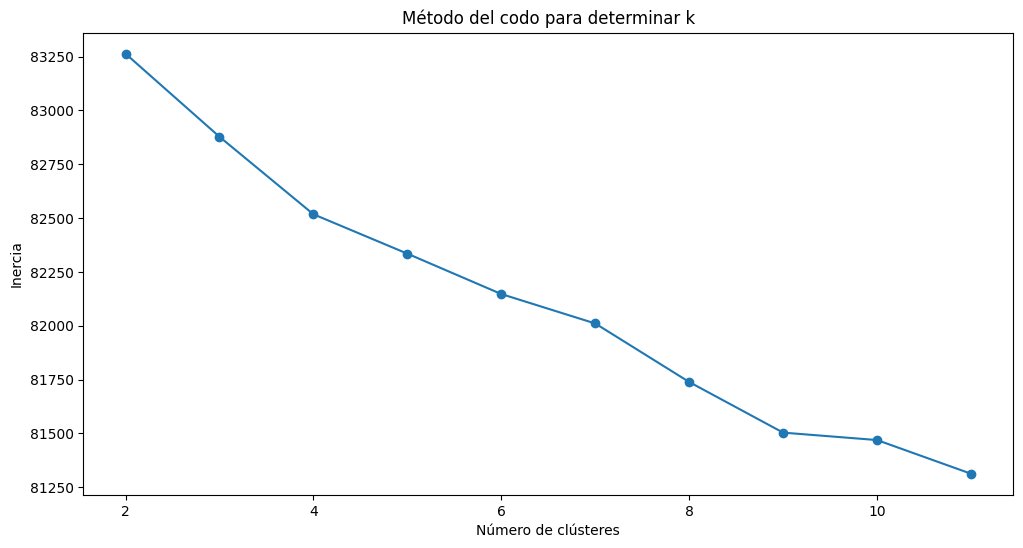

In [7]:
# Paso 2: Aplicar K-Means Clustering
# Determinar el número óptimo de clústeres (k)
# Aquí utilizamos un rango de 2 a 11
inertia = []
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo para encontrar el mejor valor de k
plt.figure(figsize=(12, 6))
plt.plot(range(2, 12), inertia, marker='o')
plt.title('Método del codo para determinar k')
plt.xlabel('Número de clústeres')
plt.ylabel('Inercia')
plt.show()

inertia = []: Crea una lista vacía llamada inertia que se utilizará para almacenar los valores de inercia (suma de las distancias cuadradas de cada punto al centroide más cercano) para diferentes valores de 'k' en el algoritmo K-Means.

for k in range(2, 12): Inicia un bucle que va desde '2' hasta '11' (inclusive), lo que significa que se probarán diferentes valores de 'k' para el clustering, desde 2 hasta 11 clústeres.

kmeans = KMeans(n_clusters=k, random_state=42): Crea un objeto K-Means llamado kmeans con el número actual de clústeres 'k' y un estado aleatorio fijo para reproducibilidad (random_state=42).

kmeans.fit(tfidf_matrix): Aplica el algoritmo K-Means a la matriz TF-IDF tfidf_matrix utilizando el valor actual de 'k' y ajusta el modelo a los datos.

inertia.append(kmeans.inertia_): Agrega el valor de inercia calculado para el valor actual de 'k' a la lista inertia. La inercia es una medida de cuán compactos son los clústeres en el espacio de características.

Se crea un gráfico utilizando Matplotlib que muestra el método del codo para determinar el número óptimo de clústeres ('k'). El método del codo implica trazar el número de clústeres en el eje x y la inercia en el eje y. El "codo" en el gráfico corresponde al punto en el que la inercia comienza a disminuir menos significativamente, lo que generalmente indica el número óptimo de clústeres. El gráfico ayuda a seleccionar un valor adecuado para 'k' al identificar el punto en el que se produce una "curva codo" en la gráfica.

In [8]:
# Elegimos un valor de k basado en el método del codo
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)

Se elige un valor de 'k' igual a 4, que representa el número de clústeres que se desea en el algoritmo K-Means.

Se crea un objeto K-Means llamado kmeans con el valor de 'k' seleccionado (4) y un estado aleatorio fijo para reproducibilidad (random_state=42).

Se aplica el algoritmo K-Means a la matriz TF-IDF tfidf_matrix utilizando el modelo configurado en el paso anterior (con 4 clústeres). El resultado de esta operación es la asignación de cada documento (representado en la matriz TF-IDF) a uno de los 4 clústeres. Esto se almacena en la variable clusters, donde cada elemento indica a qué clúster pertenece cada documento.

In [9]:
# Paso 3: Análisis de los Clústeres
# Agregar la información de clúster al DataFrame para análisis
df_subset_1['cluster'] = clusters

df_subset_1['cluster'] = clusters: Se agrega una nueva columna llamada 'cluster' al DataFrame df_subset_1. La información de los clústeres que se obtuvo previamente en la variable clusters (asignación de cada documento a un clúster) se almacena en esta columna. De esta manera, se asocia cada fila del DataFrame con su respectivo clúster, lo que facilita el análisis y la identificación de a qué clúster pertenece cada registro en el conjunto de datos.

In [10]:
# Identificar los Tweets más Representativos de Cada Clúster
# Esto se hace encontrando los tweets más cercanos a cada centroide de clúster

def find_representative_tweets(tfidf_matrix, kmeans_model, n_tweets=3):
    """
    Encuentra los tweets más representativos (más cercanos a los centroides) para cada clúster.
    :param tfidf_matrix: Matriz TF-IDF de los tweets.
    :param kmeans_model: Modelo K-Means entrenado.
    :param n_tweets: Número de tweets representativos a encontrar por clúster.
    :return: Un diccionario con clústeres como claves y los índices de los tweets más representativos como valores.
    """
    representative_tweets = {}
    centroids = kmeans_model.cluster_centers_

    for i in range(k):
        # Distancias de todos los puntos en el clúster al centroide
        distances = cosine_similarity(tfidf_matrix[kmeans_model.labels_ == i], [centroids[i]])
        # Índices de los n_tweets más cercanos al centroide
        top_indices = distances.flatten().argsort()[-n_tweets:][::-1]
        representative_tweets[i] = top_indices

    return representative_tweets

La función toma tres parámetros:

tfidf_matrix: La matriz TF-IDF que representa los tweets.
kmeans_model: El modelo K-Means previamente entrenado que contiene información sobre los clústeres.
n_tweets: El número de tweets representativos que se desea encontrar por clúster (valor predeterminado es 3).
Se crea un diccionario llamado representative_tweets para almacenar los resultados, donde las claves serán los números de los clústeres y los valores serán listas de índices de tweets representativos.

Se obtienen los centroides de cada clúster a partir del modelo K-Means utilizando kmeans_model.cluster_centers_.

Se itera a través de cada clúster (de 0 a k-1, donde 'k' es el número de clústeres).

Para cada clúster, se calculan las distancias coseno entre todos los puntos (tweets) en el clúster y el centroide de ese clúster. Las distancias se almacenan en la variable distances.

Luego, se encuentran los índices de los n_tweets más cercanos al centroide del clúster actual utilizando argsort() para ordenar las distancias y seleccionar los índices de los tweets más cercanos.

Los índices de los tweets más representativos se almacenan en el diccionario representative_tweets bajo la clave correspondiente al clúster actual.

Finalmente, la función devuelve el diccionario representative_tweets que contiene los índices de los tweets más representativos para cada clúster. Estos índices se pueden utilizar posteriormente para acceder a los tweets reales en el conjunto de datos original.

In [11]:
representative_tweets = find_representative_tweets(tfidf_matrix, kmeans)


Se llama a la función find_representative_tweets con dos argumentos, tfidf_matrix y kmeans, y almacena el resultado en una variable llamada representative_tweets. En resumen, se calcula y almacena los tweets más representativos para cada clúster en un conjunto de datos utilizando la matriz TF-IDF y el modelo K-Means previamente entrenado. La variable representative_tweets contendrá la información sobre cuáles son los tweets más representativos para cada clúster.

In [12]:
# Mostrar los tweets más representativos de cada clúster
for cluster, tweet_indices in representative_tweets.items():
    print(f"Cluster {cluster}:")
    for index in tweet_indices:
        print(f"- {tweets_df.iloc[index]['tweet']}")
    print("\n")

Cluster 0:
- La responsabilidad de cuidarnos es de todos!  #yomecuido  #yotecuido  #quedateencasa  #coronavirus  #pandemia en Antofagasta, Chile  https://t.co/2flHpFAKIq
- BBC Mundo - Coronavirus: qué están haciendo las grandes economías para evitar la bancarrota de las empresas y la escasez de dinero (y hasta dónde pueden llegar)  https://t.co/jPp0HWte7H
- Gobierno implementa intenso monitoreo de las medidas frente al coronavirus en la región.  https://t.co/NvYhdOQbgA en Coquimbo Region  https://t.co/UYMKzWJWWc


Cluster 1:
- Se imaginan que a los funcionarios del compin que están contagiados de covid-19 les rechacen las licencias ?
- No encontré alcohol gel, me sirve el absenta ? 🙄 #MeQuedoEnCasa #CoronavirusChile #covid19chile #CuarentenaCoronavirus #Chile #YoMeQuedoEnMiCasa #RechazoStarbucks #coronavirus #Iquique  https://t.co/k8DGzt5Etx
- Invitamos a los adultos mayores 65 y mas sin problemas de salud para vacunar, en recinto Terminal Agropecuario #Iquique #Chile #FelizSabado #Gra

Itera a través del diccionario representative_tweets, que contiene información sobre los tweets más representativos para cada clúster.

Para cada clúster, imprime un encabezado indicando el número de clúster, por ejemplo, "Cluster 0:".

Luego, itera a través de los índices de los tweets más representativos en ese clúster y muestra el contenido de cada uno de esos tweets utilizando tweets_df.iloc[index]['tweet'].

Después de mostrar todos los tweets representativos para un clúster, imprime una línea en blanco para separar los resultados de diferentes clústeres.

Cluster 0 -> Enfoque en la Prevención y Responsabilidad Colectiva: Los tweets en este clúster parecen centrarse en la promoción de la responsabilidad personal y colectiva en la prevención de la propagación del COVID-19. Por ejemplo, mencionan quedarse en casa, cuidarse mutuamente, y señalan esfuerzos gubernamentales para monitorear las medidas contra el coronavirus. Este clúster podría estar reflejando una actitud más proactiva y comunitaria hacia la pandemia.

Cluster 1 -> Información Práctica y Protección Personal: Este clúster incluye tweets que abordan aspectos prácticos de la pandemia, como la búsqueda de alcohol gel, vacunación de adultos mayores, y posiblemente una dosis de humor o ironía. Este grupo parece enfocarse en la vida cotidiana durante la pandemia, incluyendo medidas de protección personal y consejos prácticos.

Cluster 2 -> Experiencias Personales y Conversaciones Informales: Los tweets de este clúster parecen reflejar experiencias personales y conversaciones más informales relacionadas con el COVID-19. Podría incluir expresiones de opiniones personales, intercambios entre usuarios, y posiblemente algunas reflexiones humorísticas o ligeras sobre la situación.

Cluster 3 -> Crítica y Análisis del Manejo de la Pandemia: Este clúster parece contener tweets que critican o analizan la gestión de la pandemia, con un enfoque en la responsabilidad de las autoridades y la equidad en la aplicación de medidas. Puede reflejar una perspectiva más crítica o analítica sobre cómo se ha manejado la situación y sus impactos en diferentes grupos.

# 2.- Rotulación de datos en base a la orientación de cada Tweet

## Eliminamos URL y menciones

In [13]:
import re

# Función para limpiar cada tweet
def clean_tweet(tweet):
    # Eliminar URLs
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Eliminar menciones a usuarios
    tweet = re.sub(r'@\w+', '', tweet)
    return tweet

# Aplicar la función de limpieza a los tweets
df_subset_1['cleaned_tweet'] = df_subset_1['tweet'].apply(clean_tweet)

# Verificar los resultados
df_subset_1[['tweet', 'cleaned_tweet']].head()

,tweet,cleaned_tweet
0,"#calvin está raja, pero raja flojeando en esta...","#calvin está raja, pero raja flojeando en esta..."
1,@claudioapruebo5 @NuevaConstituc3 Abren fantas...,Abren fantasilandia y no permiten que uno vi...
2,▶️Autoridades dan a conocer el reporte actuali...,▶️Autoridades dan a conocer el reporte actuali...
3,"Reporte COVID-19, Tarapacá, 31/10/2020. 🕑 @u...","Reporte COVID-19, Tarapacá, 31/10/2020. 🕑 ..."
4,👉🏼🦹🏻‍♀️Conoce las actividades de riesgo modera...,👉🏼🦹🏻‍♀️Conoce las actividades de riesgo modera...


## Análisis de frecuencias

In [14]:
sentiment_counts = df_subset_1['clean_class'].value_counts()
print(sentiment_counts)

clean_class
Positivo           26328
No Clasificable    24620
Negativo           24233
Neutro              9819
Name: count, dtype: int64


# Visualización en base a la orientación de cada Tweet

## Por cantidad 

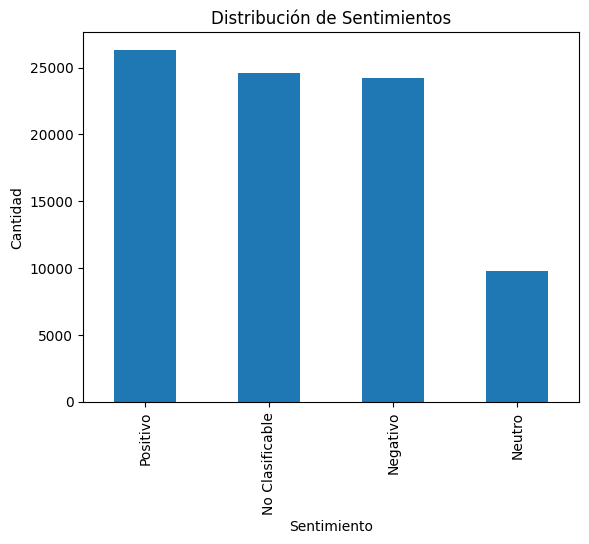

In [15]:
import matplotlib.pyplot as plt

sentiment_counts.plot(kind='bar')
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad')
plt.show()

## Por tiempo

Primero preparamos los datos para que las marcas de tiempo estén en un formato adecuado para el análisis de series temporales, es decir, convertir a un tipo de dato 'datetime' de pandas.
Además de considerar únicamente los datos que son catalogados como 'Positivo', 'Negativo' y 'Neutro' omitiendo la categoria 'No clasificable'.

In [16]:
df_subset_1['date'] = pd.to_datetime(df_subset_1['date'])

# Filtrar y conservar solo los tweets clasificados como Positivo, Negativo o Neutro
filtered_tweets = df_subset_1[df_subset_1['clean_class'].isin(['Positivo', 'Negativo', 'Neutro'])]

In [17]:
# Agrupar por fecha y sentimiento, y contar las ocurrencias
sentiment_trends = filtered_tweets.groupby([filtered_tweets['date'].dt.date, 'clean_class']).size().unstack().fillna(0)

Se visualiza estas tendencias en un gráfico de líneas para ver cómo los sentimientos Positivo, Negativo y Neutro han cambiado con el tiempo.

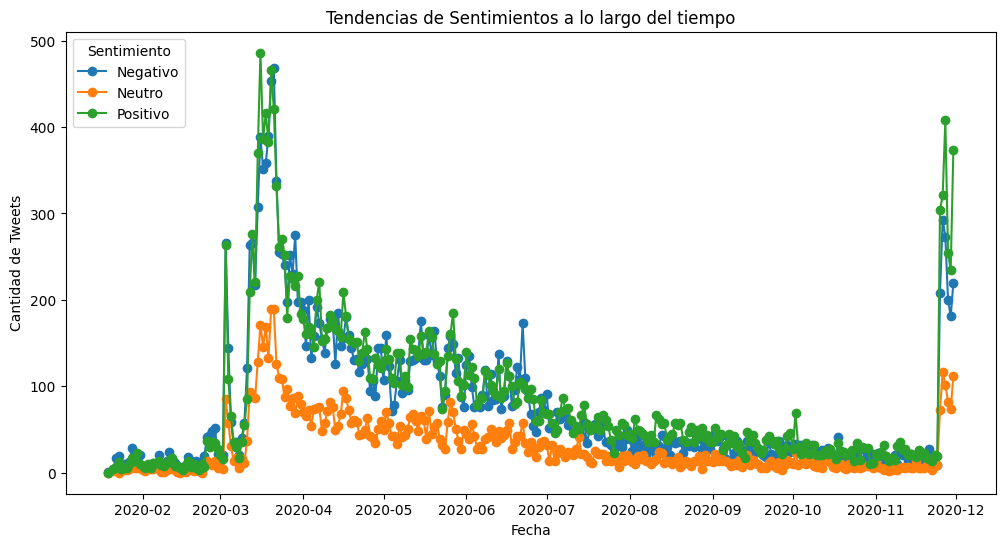

In [18]:
# Graficar las tendencias de sentimiento a lo largo del tiempo
sentiment_trends.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Tendencias de Sentimientos a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Tweets')
plt.legend(title='Sentimiento')
plt.show()

## Realizamos un analisis en el aumento de Tweets entre Marzo y Abril del 2020

In [19]:
start_date = "2020-03-01"
end_date = "2020-04-01"
mask = (df_subset_1['date'] >= start_date) & (df_subset_1['date'] <= end_date)
tweets_mar_apr = df_subset_1.loc[mask]

C:\Users\exequ\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


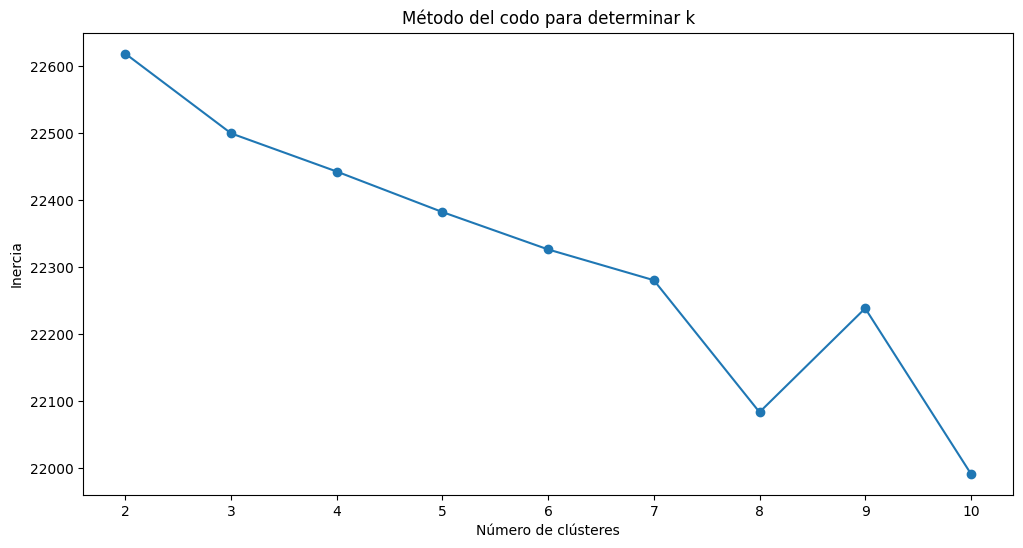

In [20]:
# Vectorizar los tweets para este período específico
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix_mar_apr = tfidf_vectorizer.fit_transform(tweets_mar_apr['clean_tweet'])

# Aplicar K-Means Clustering
# Determinar el número óptimo de clústeres (k)
# Aquí utilizamos un rango de 2 a 10
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix_mar_apr)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo para encontrar el mejor valor de k
plt.figure(figsize=(12, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Método del codo para determinar k')
plt.xlabel('Número de clústeres')
plt.ylabel('Inercia')
plt.show()

In [21]:
# Aplicar K-Means
k = 7
kmeans = KMeans(n_clusters=k, random_state=42)
clusters_mar_apr = kmeans.fit_predict(tfidf_matrix_mar_apr)

# Identificar los tweets más representativos para cada clúster
def find_representative_tweets(tfidf_matrix, kmeans_model, n_tweets=3):
    representative_tweets = {}
    centroids = kmeans_model.cluster_centers_
    
    for i in range(k):
        distances = cosine_similarity(tfidf_matrix[kmeans_model.labels_ == i], [centroids[i]])
        top_indices = distances.flatten().argsort()[-n_tweets:][::-1]
        representative_tweets[i] = tweets_mar_apr.iloc[top_indices].index.tolist()
    
    return representative_tweets

representative_tweets_mar_apr = find_representative_tweets(tfidf_matrix_mar_apr, kmeans)

# Mostrar los tweets más representativos de cada clúster
for cluster, tweet_indices in representative_tweets_mar_apr.items():
    print(f"Cluster {cluster}:")
    for index in tweet_indices:
        print(f"- {tweets_mar_apr.loc[index]['tweet']}")
    print("\n")

Cluster 0:
- BBC News - Coronavirus: 'Nothing ruled out' in government's virus battle tactics  https://t.co/9iuQlIdLHS
- #PabloIglesias ...Polémica en España: Gobierno compra a empresa china 340.000 test rápidos de covid-19 que están defectuosos  https://t.co/6gxWtFxtjm vía @emol
- Habemus #Covid_19 🥺


Cluster 1:
- Debería haber sido: “Afortunadamente, Coronavirus dio negativo a examen de Piñeravirus” #covid19chile #
- Oye avísenle a @jmanalich y al @ministeriosalud que suspendan por un mes las clases, tele trabajo... Aaaa no, van a dejar la caga con tal de no hacer el plebiscito. Hasta el loli perrito #Covid_19 #YoMeQuedoEnCasa #Chile #Apruebo #cuarentena #ULTIMAHORA
- Tarapacá se mantiene con 4 casos confirmados de coronavirus  https://t.co/zoOR6g96OF


Cluster 2:
- Desde que llegó el coronavirus a Chile haz pensado mucho en la extinción de la raza humana??
- 🔴Ministerio de Salud confirma primer caso de #COVID_19 en la Región de Atacama. Se trata de un adulto mayor de 50 años de eda

Analizando los tweets mas representativos de cada clúster, se puede inferir de que el aumento en la cantidad de tweets que se realizaron entre marzo y abril del año 2020, fueron a causa de la llegada del coronavirus a Chile y la preocupación que existió por su rápida propagación y medidas inneficientes por parte del gobierno.

# 3.- Construcción de un clasificador para determinar la orientación de las opiniones

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 'cleaned_tweet' es la columna con el texto del tweet y 'clean_class' la de las etiquetas
X = df_subset_1['cleaned_tweet']  # Texto del tweet
y = df_subset_1['clean_class']    # Etiqueta de sentimiento


Importamos pandas
train_test_split se importa desde sklearn.model_selection y se utiliza para dividir los datos en conjuntos de entrenamiento y prueba.
Asigna las columnas de interés:

X se crea asignando la columna 'cleaned_tweet' del DataFrame df_subset_1 a esta variable. Esta columna contiene el texto de los tweets, que probablemente será la característica principal utilizada para entrenar el modelo.
y se crea asignando la columna 'clean_class' del DataFrame df_subset_1 a esta variable. Esta columna contiene las etiquetas de sentimiento asociadas con los tweets, que serán los valores que el modelo intentará predecir.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Se utiliza la función train_test_split de scikit-learn para dividir los datos en conjuntos de entrenamiento y prueba.

X y y son las características (texto de los tweets) y las etiquetas (sentimientos) respectivamente, que se han asignado previamente.
test_size=0.2 indica que se desea dividir los datos de manera que el 20% del total se utilice como conjunto de prueba, mientras que el 80% restante se utilizará como conjunto de entrenamiento.
random_state=42 es una semilla (seed) que se utiliza para garantizar la reproducibilidad. Cuando se establece random_state en un valor específico (en este caso, 42), la división de los datos será la misma cada vez que se ejecute el código. Esto es útil para obtener resultados consistentes cuando se trabaja con datos aleatorios.

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Se convierte el texto en vectores numéricos utilizando, TF-IDF.

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

Importa la clase TfidfVectorizer de la biblioteca scikit-learn (sklearn.feature_extraction.text). Esta clase se utiliza para convertir texto en vectores TF-IDF.

Se crea un objeto tfidf_vectorizer de la clase TfidfVectorizer con la configuración max_features=5000. Esto significa que se construirán vectores TF-IDF utilizando las 5000 palabras más relevantes del conjunto de datos. Esto puede ayudar a reducir la dimensionalidad y mejorar el rendimiento computacional.

Se aplica el vectorizador a los conjuntos de entrenamiento y prueba:

X_train_tfidf se obtiene aplicando tfidf_vectorizer.fit_transform(X_train). Esto ajusta el vectorizador a los datos de entrenamiento (X_train) y luego transforma ese conjunto de entrenamiento en vectores TF-IDF. Estos vectores representan la importancia relativa de cada palabra en cada tweet dentro del conjunto de entrenamiento.
X_test_tfidf se obtiene aplicando tfidf_vectorizer.transform(X_test). Aquí, solo se transforma el conjunto de prueba (X_test) utilizando el vectorizador previamente ajustado con los datos de entrenamiento. Esto garantiza que las mismas palabras se utilicen para construir vectores TF-IDF en ambos conjuntos, lo que es importante para la consistencia en la evaluación del modelo.

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Modelos a comparar
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Random Forest": RandomForestClassifier()
}

# Entrenamiento de modelos
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    print(f"{name} ha sido entrenado.")

Naive Bayes ha sido entrenado.
Logistic Regression ha sido entrenado.
Random Forest ha sido entrenado.


Importa las clases de modelos desde scikit-learn (sklearn.naive_bayes.MultinomialNB, sklearn.linear_model.LogisticRegression, sklearn.ensemble.RandomForestClassifier) que se utilizarán para construir los modelos.

Crea un diccionario llamado models que contiene tres modelos de clasificación diferentes junto con sus respectivos nombres:

"Naive Bayes" representa un modelo de clasificación bayesiano ingenuo (Naive Bayes).
"Logistic Regression" representa un modelo de regresión logística.
"Random Forest" representa un modelo de bosques aleatorios.
Luego, el código entra en un bucle for que itera a través de cada par clave-valor en el diccionario models. Para cada modelo, realiza lo siguiente:

Ajusta el modelo a los datos de entrenamiento utilizando model.fit(X_train_tfidf, y_train). Esto significa que el modelo está aprendiendo a partir de los vectores TF-IDF (X_train_tfidf) y las etiquetas de entrenamiento (y_train) para predecir el sentimiento de los tweets.
Imprime un mensaje indicando que el modelo ha sido entrenado con éxito, como por ejemplo: "Naive Bayes ha sido entrenado."

In [26]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluación de los modelos
for name, model in models.items():
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Modelo: {name}")
    print(f"Exactitud: {accuracy}")
    print(classification_report(y_test, y_pred))

Modelo: Naive Bayes
Exactitud: 0.6992352941176471
                 precision    recall  f1-score   support

       Negativo       0.64      0.83      0.72      4844
         Neutro       0.54      0.02      0.04      1978
No Clasificable       0.82      0.70      0.75      4875
       Positivo       0.68      0.84      0.75      5303

       accuracy                           0.70     17000
      macro avg       0.67      0.60      0.57     17000
   weighted avg       0.69      0.70      0.66     17000

Modelo: Logistic Regression
Exactitud: 0.8234117647058824
                 precision    recall  f1-score   support

       Negativo       0.81      0.87      0.84      4844
         Neutro       0.68      0.17      0.28      1978
No Clasificable       0.85      0.96      0.90      4875
       Positivo       0.82      0.89      0.85      5303

       accuracy                           0.82     17000
      macro avg       0.79      0.73      0.72     17000
   weighted avg       0.81      

Importa las funciones classification_report y accuracy_score desde scikit-learn (sklearn.metrics) que se utilizarán para evaluar los modelos.

Entra en un bucle for que itera a través de cada par clave-valor en el diccionario models, que contiene los modelos entrenados.

Para cada modelo, realiza lo siguiente:

Utiliza el modelo para hacer predicciones en el conjunto de prueba (X_test_tfidf) mediante model.predict(X_test_tfidf). Esto genera las predicciones del modelo y las almacena en y_pred.

Calcula la exactitud (accuracy) del modelo comparando las predicciones (y_pred) con las etiquetas reales del conjunto de prueba (y_test) utilizando accuracy_score(y_test, y_pred). La exactitud mide la proporción de predicciones correctas del modelo.

Imprime el nombre del modelo, la exactitud obtenida y un informe de clasificación (classification_report). El informe de clasificación proporciona métricas de evaluación detalladas, como la precisión, la recuperación y el puntaje F1 para cada etiqueta de clase. Esto ayuda a comprender el rendimiento del modelo en diferentes categorías de clasificación.



Observaciones de los resultados:

-Naive Bayes: Este modelo tiene una precisión razonable pero muestra una tendencia a ser mejor en la identificación de tweets "Negativos" y "Positivos", con un buen recall en estas categorías. Sin embargo, tiene un desempeño muy bajo en la categoría "Neutro", lo que indica que no es eficaz para identificar los tweets neutrales.

-Regresión logística: Este modelo es significativamente más preciso que Naive Bayes y Random Forest en este conjunto de datos. Tiene una alta precisión en todas las categorías y un buen equilibrio entre precisión y recall, lo que resulta en los mejores puntajes F1 de los tres modelos. La precisión es especialmente alta para "No Clasificable", lo que sugiere que este modelo es muy bueno para identificar tweets que no encajan claramente en categorías positivas o negativas.

-Random Forest: Aunque este modelo tiene una alta precisión en la categoría "Neutro", su recall es muy bajo, lo que significa que puede identificar correctamente los tweets neutros pero se le escapan muchos. Esto se refleja en el bajo puntaje F1 para esta categoría. Random Forest tiende a tener un mejor desempeño para los tweets "No Clasificable" y "Positivo", pero en general, su exactitud es la más baja de los tres modelos.

Se puede concluir que la regresión logística es el modelo más equilibrado y preciso para este conjunto de datos según los resultados obtenidos.

## Mejora de rendimiento del modelo de regresión logística

La validación cruzada es una técnica que permite evaluar la eficacia de un modelo de aprendizaje automático de una manera más rigurosa y menos sesgada que una simple división entre entrenamiento y prueba. A continuación se realizará el ajuste de hiperparámetros lo cuál ayudará a encontrar la configuración óptima para el rendimiento del modelo:

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Definir el modelo de regresión logística
logreg = LogisticRegression(solver='liblinear', max_iter=5000)

# Definir la cuadrícula de hiperparámetros para buscar
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Valores comunes para el parámetro de regularización C
    'penalty': ['l1', 'l2']  # l1 es Lasso y l2 es Ridge
}

# Configurar GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

# Realizar la búsqueda en la cuadrícula con validación cruzada
grid_search.fit(X_train_tfidf, y_train)

# Ver los mejores parámetros encontrados y la mejor puntuación
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor puntuación de validación cruzada (exactitud): {grid_search.best_score_}")

# Evaluar el mejor modelo encontrado en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_tfidf)
print(f"Exactitud en el conjunto de prueba: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Mejores parámetros: {'C': 10, 'penalty': 'l1'}
Mejor puntuación de validación cruzada (exactitud): 0.8690147058823531
Exactitud en el conjunto de prueba: 0.8695882352941177
                 precision    recall  f1-score   support

       Negativo       0.85      0.90      0.88      4844
         Neutro       0.78      0.38      0.51      1978
No Clasificable       0.90      0.98      0.94      4875
       Positivo       0.88      0.92      0.90      5303

       accuracy                           0.87     17000
      macro avg       0.85      0.80      0.81     17000
   weighted avg       0.86      0.87      0.86     17000



Importa las bibliotecas y clases necesarias:

GridSearchCV desde sklearn.model_selection se utiliza para realizar una búsqueda de hiperparámetros utilizando validación cruzada.
LogisticRegression desde sklearn.linear_model es el modelo de Regresión Logística que se ajustará durante la búsqueda de hiperparámetros.
Se define el modelo de Regresión Logística (logreg) con algunos hiperparámetros iniciales, como el solucionador ('liblinear') y el número máximo de iteraciones (5000).

Se define un diccionario llamado param_grid que especifica la cuadrícula de hiperparámetros que se van a buscar. En este caso, se buscan diferentes valores para el parámetro de regularización 'C' y diferentes tipos de penalización ('l1' y 'l2').

Se configura el objeto grid_search de GridSearchCV para realizar una búsqueda exhaustiva de hiperparámetros:

Se utiliza el modelo de Regresión Logística (logreg).
Se especifica el diccionario param_grid que contiene las combinaciones de hiperparámetros a probar.
cv=5 especifica que se utilice una validación cruzada de 5 pliegues durante la búsqueda para evaluar el rendimiento del modelo en diferentes subconjuntos de datos de entrenamiento y validación.
scoring='accuracy' indica que se utilizará la exactitud como métrica para evaluar el rendimiento de los modelos en cada conjunto de validación.
Se realiza la búsqueda exhaustiva en la cuadrícula con validación cruzada mediante grid_search.fit(X_train_tfidf, y_train). Esto ajusta el modelo de Regresión Logística con diferentes combinaciones de hiperparámetros y evalúa su rendimiento en los datos de entrenamiento.

Se imprimen los mejores parámetros encontrados (grid_search.best_params_) y la mejor puntuación de validación cruzada (exactitud) (grid_search.best_score_). Estos valores indican la configuración de hiperparámetros que proporciona el mejor rendimiento en la validación cruzada.

Se evalúa el mejor modelo encontrado en el conjunto de prueba:

Se obtiene el mejor modelo utilizando grid_search.best_estimator_.
Se hacen predicciones en el conjunto de prueba (X_test_tfidf) con el mejor modelo.
Se imprime la exactitud en el conjunto de prueba y un informe de clasificación (classification_report) que proporciona métricas detalladas de rendimiento.


Después de una búsqueda exhaustiva de hiperparámetros utilizando GridSearchCV, se observa una mejora sustancial en el rendimiento del modelo de Regresión Logística, que logra una alta exactitud del 86.96% y un equilibrio sólido en la clasificación de opiniones en tweets, incluida la clase "Neutro". Por otro lado, el modelo de Naive Bayes no muestra cambios significativos en su rendimiento, y el modelo de Bosques Aleatorios continúa siendo menos preciso en comparación con los otros dos. En consecuencia, la Regresión Logística se erige como la elección recomendada para la tarea de clasificación de opiniones en este conjunto de datos, demostrando una capacidad mejorada para identificar y etiquetar adecuadamente las opiniones expresadas en los tweets.